In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("Configurations"))))
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("utils"))))
import Configurations
from utils import plotUtils
from utils import modelUtils
from utils import dataframeUtil
from utils import statisticsUtils
from utils import chartChecker as check
import mean_threshold_model as mmt
import numpy as np
from random import randrange

Configuration report:
Number of Subgroups is: 7
The Trend Simulation Formel is: x*1.3+10


In [2]:
# get Training data
x, y, test_x, test_y = modelUtils.getTrainAndTestData()
neuralInputsNumber = Configurations.neuralInputsNumber
targetVarNumber = Configurations.numberOftargetVariables

<AxesSubplot:title={'center':'Trend down'}, xlabel='Zeit', ylabel='Werte'>

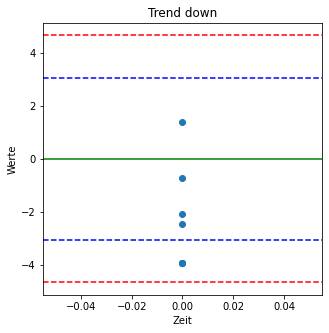

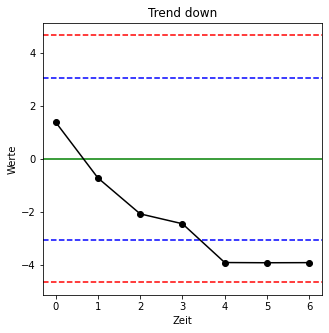

In [3]:
x,y = dataframeUtil.getRandomChartFrom_csv("../"+Configurations.trainDatasetName)
axs = plotUtils.plotChartWithoutTime(x.values[0],modelUtils.getDetectionLabel_for_5y(y.values)[0])

plotUtils.plotChart(x.values[0],modelUtils.getDetectionLabel_for_5y(y.values)[0])

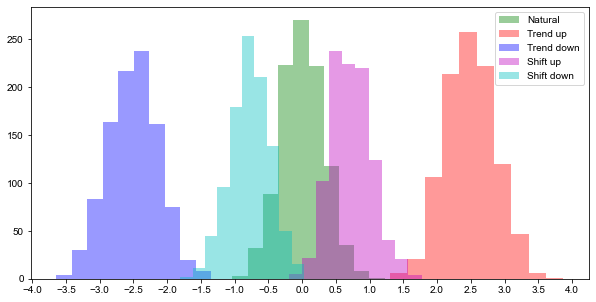

-1.8068855202304026 1.7693335352224506


In [4]:
label_1 = 'Natural'
label_2 = 'Trend up'
label_3 = 'Trend down'
label_4 = 'Shift up'
label_5 = 'Shift down'
DataPoinstsNumber = 7#Configurations.neuralInputsNumber
x,y=dataframeUtil.getDataset("../"+Configurations.trendUptrainDatasetName,Configurations.neuralInputsNumber,1)
means_trendup, stds_trendup = statisticsUtils.getNormalDistParam(x[:,0:DataPoinstsNumber])

x,y=dataframeUtil.getDataset("../"+Configurations.trendDowntrainDatasetName,Configurations.neuralInputsNumber,1)
means_trendDown, stds_trendDown = statisticsUtils.getNormalDistParam(x[:,0:DataPoinstsNumber])

x,y=dataframeUtil.getDataset("../"+Configurations.natural_trainDatasetName,Configurations.neuralInputsNumber,1)
means_natural, stds_natural = statisticsUtils.getNormalDistParam(x[:,0:DataPoinstsNumber])

x,y=dataframeUtil.getDataset("../"+Configurations.shiftUptrainDatasetName,Configurations.neuralInputsNumber,1)
means_shiftUp, stds_shiftUp = statisticsUtils.getNormalDistParam(x[:,0:DataPoinstsNumber])

x,y=dataframeUtil.getDataset("../"+Configurations.shiftDowntrainDatasetName,Configurations.neuralInputsNumber,1)
means_shiftDown, stds_shiftDown = statisticsUtils.getNormalDistParam(x[:,0:DataPoinstsNumber])

plotUtils.plotHistogram_5(means_natural,means_trendup,means_trendDown,means_shiftUp,means_shiftDown,label_1,label_2,label_3,label_4,label_5,"means_analyse")
min_val, max_val = np.min(means_shiftDown), np.max(means_shiftUp)
print(min_val, max_val)

#plotUtils.plot3kd(means_natural,means_trendup,means_trendDown,label_1,label_2,label_3,"means_analyse")
#plotUtils.plot3kd(means_natural,means_shiftUp,means_shiftDown,label_1,label_4,label_5,"means_analyse")

-1.8068855202304026 1.7693335352224506
0.993


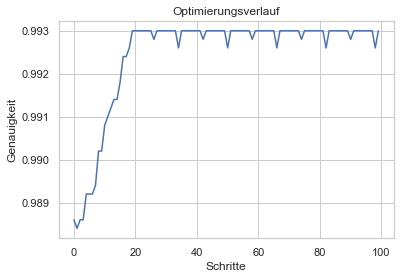

-1.8068855202304026 1.6093335352224505
done ...


In [5]:
mmt.trainModel(Configurations.neuralInputsNumber)

[[0. 0. 1. 0. 0.]]
[[0, 0, 1, 0, 0]]
1.0536971390854073


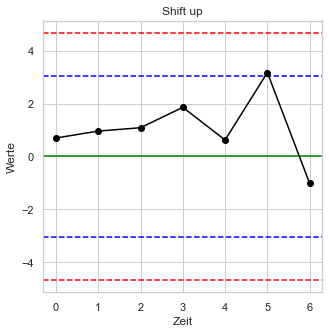

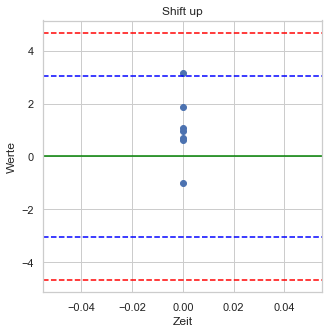

In [6]:
x, y, test_x, test_y = modelUtils.getTrainAndTestData()
a = randrange(0 , len(x))
print(np.asanyarray([y[a]]))
res = mmt.predictOne(x[a])
print(res)
plotUtils.plotChart(x[a],modelUtils.getDetectionLabel_for_5y( np.asanyarray([y[a]]))[0])
print(np.mean(x[a]))
axs = plotUtils.plotChartWithoutTime(x[a],modelUtils.getDetectionLabel_for_5y( np.asanyarray([y[a]]))[0])


In [7]:
predictions = mmt.predict(test_x)
print(test_y.shape)
accurancy,confusionMatrix,report = modelUtils.getMetric(predictions,test_y)
print(accurancy)
print(report)

(5000, 5)
0.993
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1000
           1       1.00      0.97      0.99      1000
           2       1.00      1.00      1.00      1000
           3       0.98      1.00      0.99      1000
           4       0.99      1.00      0.99      1000

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



-2.3693657937915082 1.9261900489910937
0.9304


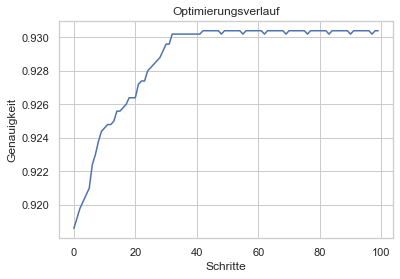

-2.3693657937915082 1.5061900489910933
done ...
              precision    recall  f1-score   support

           0       0.93      0.29      0.45      1000
           1       1.00      0.02      0.03      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.21      1.00      0.35      1000

    accuracy                           0.26      5000
   macro avg       0.43      0.26      0.17      5000
weighted avg       0.43      0.26      0.17      5000



C:\Users\Kal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318: Unde

In [8]:
DataPoinstsNumber = 4
mmt.trainModel(DataPoinstsNumber)
predictions = mmt.predict(test_x[:,0:DataPoinstsNumber])
accurancy,confusionMatrix,report = modelUtils.getMetric(predictions,test_y)
print(report)

In [9]:
print(x[:,0:DataPoinstsNumber])

[[-2.1769876  -0.07568042 -1.62268508 -0.55876126]
 [ 0.9798602  -0.91730096 -0.07364462  0.68151877]
 [ 0.7302141   0.466834    0.92527174  0.49579031]
 ...
 [ 0.91797075  0.81085105 -0.99115844 -2.13515229]
 [-0.25373415  0.75797914 -0.8253204  -0.72600013]
 [ 0.39992968 -0.08843824 -1.2600149  -1.69853395]]
